รายงานแสดงผลการทำนายโรคซึมเศร้า(Psycology) ด้วยวิธี KNN-classifier

นำเข้า library ที่จำเป็นและนำเข้าข้อมูลที่ใช้ในการทำนายผล

In [36]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [37]:
patient = pd.read_excel('Psycology.xls')
patient.head()


,เพศ,อายุ,เคยมีแฟนมาแล้ว (คน),จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์,ระยะเวลาการนอน,นิสิยการกินอาหาร,เคยคิดฆ่าตัวตาย,จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์,ระดับความเครียดด้านการเงิน,เคยกินยานอนหลับ,ภาวะซึมเศร้า
0,Male,28,5,3,5-6 ชั่วโมง,อาหารสุขภาพ,Yes,8,3,Yes,Yes
1,Male,23,5,2,มากกว่า 8 ชั่วโมง,อาหารทั่วไป,No,10,4,No,Yes
2,Female,23,1,3,น้อยกว่า 5 ชั่วโมง,อาหารสุขภาพ,Yes,0,3,No,No
3,Female,20,5,5,มากกว่า 8 ชั่วโมง,Junkfood,Yes,2,5,No,Yes
4,Male,29,4,3,มากกว่า 8 ชั่วโมง,Junkfood,Yes,1,3,No,Yes


แสดงข้อมูลของชุดข้อมูล

In [38]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   เพศ                                        502 non-null    object
 1   อายุ                                       502 non-null    int64 
 2   เคยมีแฟนมาแล้ว  (คน)                       502 non-null    object
 3   จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์       502 non-null    object
 4   ระยะเวลาการนอน                             502 non-null    object
 5   นิสิยการกินอาหาร                           502 non-null    object
 6   เคยคิดฆ่าตัวตาย                            502 non-null    object
 7   จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์  502 non-null    object
 8   ระดับความเครียดด้านการเงิน                 502 non-null    object
 9   เคยกินยานอนหลับ                            502 non-null    object
 10  ภาวะซึมเศร้า                          

In [39]:
patient['ภาวะซึมเศร้า'].value_counts()

ภาวะซึมเศร้า
Yes    252
No     250
Name: count, dtype: int64

จัดการข้อมูลโดยทำการแปลงข้อมูลที่แปลงข้อมูลประเภทข้อความเป็นตัวเลขโดยใช้ LabelEncoder, แทนค่าข้อมูลที่เป็น '?' ด้วย np.nan และลบค่าที่เป็น Nan ออก

In [40]:
# แปลงค่าที่เป็น '?' เป็น NaN
patient.replace('?', np.nan, inplace=True)

# ลบแถวที่มีค่า NaN
patient.dropna(inplace=True)

# สร้าง LabelEncoder
encoder = LabelEncoder()

# แปลงทุกคอลัมน์ที่เป็น object
for col in patient.columns:
    if patient[col].dtype == 'object':
        patient[col] = encoder.fit_transform(patient[col])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23868\4080274926.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  patient.replace('?', np.nan, inplace=True)


In [41]:
patient.head()

,เพศ,อายุ,เคยมีแฟนมาแล้ว (คน),จำนวนครั้งที่ไปออกกำลังกายต่อสัปดาห์,ระยะเวลาการนอน,นิสิยการกินอาหาร,เคยคิดฆ่าตัวตาย,จำนวนชั่วโมงที่เข้าห้องสมุดในหนึ่งสัปดาห์,ระดับความเครียดด้านการเงิน,เคยกินยานอนหลับ,ภาวะซึมเศร้า
0,1,28,5.0,3.0,0,2,1,8.0,3.0,1,1
1,1,23,5.0,2.0,3,1,0,10.0,4.0,0,1
2,0,23,1.0,3.0,2,2,1,0.0,3.0,0,0
3,0,20,5.0,5.0,3,0,1,2.0,5.0,0,1
4,1,29,4.0,3.0,3,0,1,1.0,3.0,0,1


แบ่งชุดข้อมูลเและทำการทำนายผล

In [42]:
#แยก features และ target
col_names = patient.columns.tolist() 
feature_cols = col_names[:-1] 
X = patient[feature_cols]  
y = patient['ภาวะซึมเศร้า']  

# แบ่งข้อมูลออกเป็นชุดฝึก (train) และชุดทดสอบ (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# ปรับมาตรฐาน
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# สร้างโมเดล KNN
knn = KNeighborsClassifier(n_neighbors=5)

# ฝึกโมเดล
knn.fit(X_train, y_train)

# ทำนายผล
y_pred = knn.predict(X_test)

# ประเมินผล
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8794326241134752
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        70
           1       0.89      0.87      0.88        71

    accuracy                           0.88       141
   macro avg       0.88      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141



การหาค่าที่เหมาะ ด้วย GridSearchCV

In [43]:
#กำหนดพารามิเตอร์ที่ต้องการค้นหา
param_grid = {
    'n_neighbors': list(range(1, 21)),  # จำนวนเพื่อนบ้าน K ที่ต้องการทดสอบ
    'weights': ['uniform', 'distance'],  # น้ำหนักของเพื่อนบ้าน
    'metric': ['euclidean', 'manhattan']  # วิธีวัดระยะทาง
}

#สร้างโมเดล KNN และ GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

#ฝึก GridSearchCV กับชุดข้อมูล
grid_search.fit(X_train, y_train)

#แสดงผลลัพธ์ที่ดีที่สุด
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

#ใช้โมเดลที่ดีที่สุดทำนายผลบนชุดทดสอบ
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# ประเมินผล
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.8956177156177156
Test Accuracy: 0.8723404255319149
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86        70
           1       0.84      0.93      0.88        71

    accuracy                           0.87       141
   macro avg       0.88      0.87      0.87       141
weighted avg       0.88      0.87      0.87       141



กราฟแสดงความสัมพันธ์ระหว่างค่า K กับค่าเฉลี่ยของ accuracy scores 

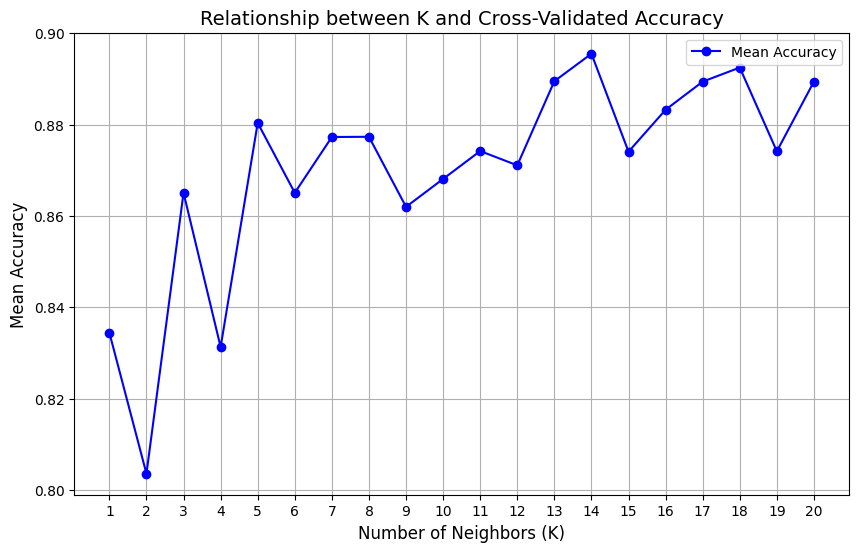

In [44]:
# กำหนดช่วงค่า K
k_values = range(1, 21)
mean_accuracy = []

# คำนวณค่า Accuracy Scores สำหรับแต่ละค่า K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_accuracy.append(scores.mean())  # เก็บค่าความแม่นยำเฉลี่ย

# สร้างกราฟ
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracy, marker='o', linestyle='-', color='b', label='Mean Accuracy')

plt.title('Relationship between K and Cross-Validated Accuracy', fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)

plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

แสดงผลการทำนายด้วย Confusion Matrix

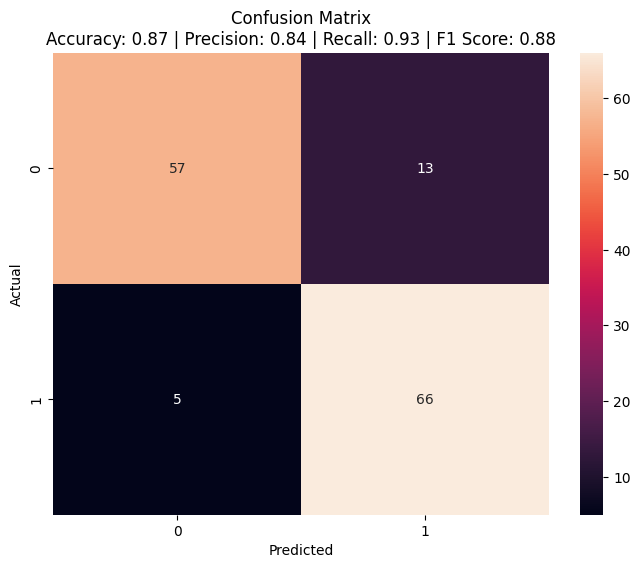

Accuracy: 0.87
Precision: 0.84
Recall: 0.93
F1 Score: 0.88


In [45]:
# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# คำนวณตัวชี้วัด
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# แสดง Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted')
plt.ylabel('Actual')


# เพิ่มข้อมูลตัวชี้วัดในชื่อกราฟ
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1 Score: {f1:.2f}', size=12)
plt.show()


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



